# Seltsame Attraktoren

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D #für 3D Plots
from io import StringIO

In [24]:
#Iterationen
n = 10000
#konstanten
delta_t = 0.01

## Hénon Abbildung

\begin{equation}
x_{n+1} = y_n +1 - a x^2_n
\end{equation}

\begin{equation}
y_{n+1} \,=\, b x_n
\end{equation}

a=1.4

b=0.3

In [25]:
def henon (vec,a=1.4,b=0.3):
    return np.array([vec[1]+1-a*vec[0]*vec[0],vec[0]*b])

In [26]:
def henon_wrapper (x_0=0,y_0=0,a=1.4,b=0.3):
    rlt=np.zeros(2*n,dtype=np.float128).reshape(n,2)
    rlt[0,0] = x_0
    rlt[0,1] = y_0
    i=1
    while(i<n):
        rlt[i,:] = henon (rlt[i-1,:],a=1.4,b=0.3)
        i += 1

    plt.plot(rlt[:,0],rlt[:,1],'r.')

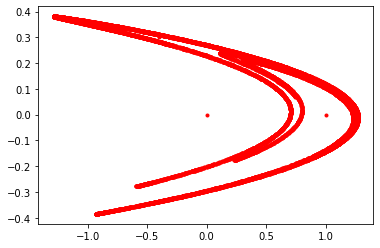

In [27]:
henon_wrapper()

## Rössler-Attraktor

\begin{equation}
\dot{x} \,=\, -y \,-\, z
\end{equation}
\begin{equation}
\dot{y} \,=\, x \,+\, ay
\end{equation}
\begin{equation}
\dot{z} \,=\, b \,+\, z(x\,-\,c)
\end{equation}

a=b=0.2
c=5.7

In [28]:
def rössler_x (y,z):
    return -y - z

def rössler_y (x,y,a=0.2):
    return x + a*y

def rössler_z (x,z,b=0.2,c=5.7):
    return b + z*(x-c)

In [29]:
def plot_phasenraum (X,Y,Z,a,b,c,n,dt,kind,factor=4):

    fig = plt.figure(figsize=(15*factor,13*factor))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(X, Y, Z)
    ax.scatter(X[np.size(X)-1], Y[np.size(X)-1], Z[np.size(X)-1], s=200*factor,c='r', marker='o', lw=2.0*factor)#, depthshade=True)
    ax.scatter(X[0], Y[0], Z[0], s=200*factor,c='m', marker='x', lw=2.0*factor)
    plt.annotate("Rössler Attraktor", xy=(0.43, 0.95), xycoords='axes fraction',fontsize=18*factor)
    text1 = r"a : %.1f" % (a)
    text2 = "b : %.1f" % (b)
    text3 = "c : %.1f" % (c)     
    plt.annotate(text1, xy=(0.01, 0.9), xycoords='axes fraction',fontsize=15*factor)
    plt.annotate(text2, xy=(0.01, 0.86), xycoords='axes fraction',fontsize=15*factor)
    plt.annotate(text3, xy=(0.01, 0.82), xycoords='axes fraction',fontsize=15*factor)
    plt.annotate("Verfahren: " + kind, xy=(0.01, 0.1), xycoords='axes fraction',fontsize=15*factor)
    plt.annotate("Anzahl: " + str(n), xy=(0.01, 0.06), xycoords='axes fraction',fontsize=15*factor)
    plt.annotate("Timesteps: " + str(dt), xy=(0.01, 0.02), xycoords='axes fraction',fontsize=15*factor)
    plt.annotate("Anfangspunkt: magenta Kreuz", xy=(0.71, 0.9), xycoords='axes fraction',fontsize=14*factor)
    plt.annotate("Endpunkt: rotes Kreuz", xy=(0.71, 0.87), xycoords='axes fraction',fontsize=14*factor)
    #ax.set_xlim3d(-25,25)
    #ax.set_ylim3d(-30,30)
    #ax.set_zlim3d(0,55)
    #ax.set_xlabel('Geschwindigkeit')
    #ax.set_ylabel('Temperatur')
    #ax.set_zlabel('Temperaturschichtung')
    ax.legend()
    #plt.show()
    plt.savefig("rössler_" + kind + ".png")

In [30]:
def rössler (x_0=0,y_0=0,z_0=0,a=0.2,b=0.2,c=5.7):

    X = np.zeros(n,dtype=np.float128)
    Y = np.zeros(n,dtype=np.float128)
    Z = np.zeros(n,dtype=np.float128)

    X[0] = x_0
    Y[0] = y_0
    Z[0] = z_0

    i=1
    while(i<n):
        X[i] = X[i-1] + delta_t * rössler_x(Y[i-1],Z[i-1])
        Y[i] = Y[i-1] + delta_t * rössler_y(X[i-1],Y[i-1],a)
        Z[i] = Z[i-1] + delta_t * rössler_z(X[i-1],Z[i-1],b,c)
        i += 1
    
    plot_phasenraum (X,Y,Z,a,b,c,n,delta_t,"Euler Einschritt",factor=3)


No handles with labels found to put in legend.


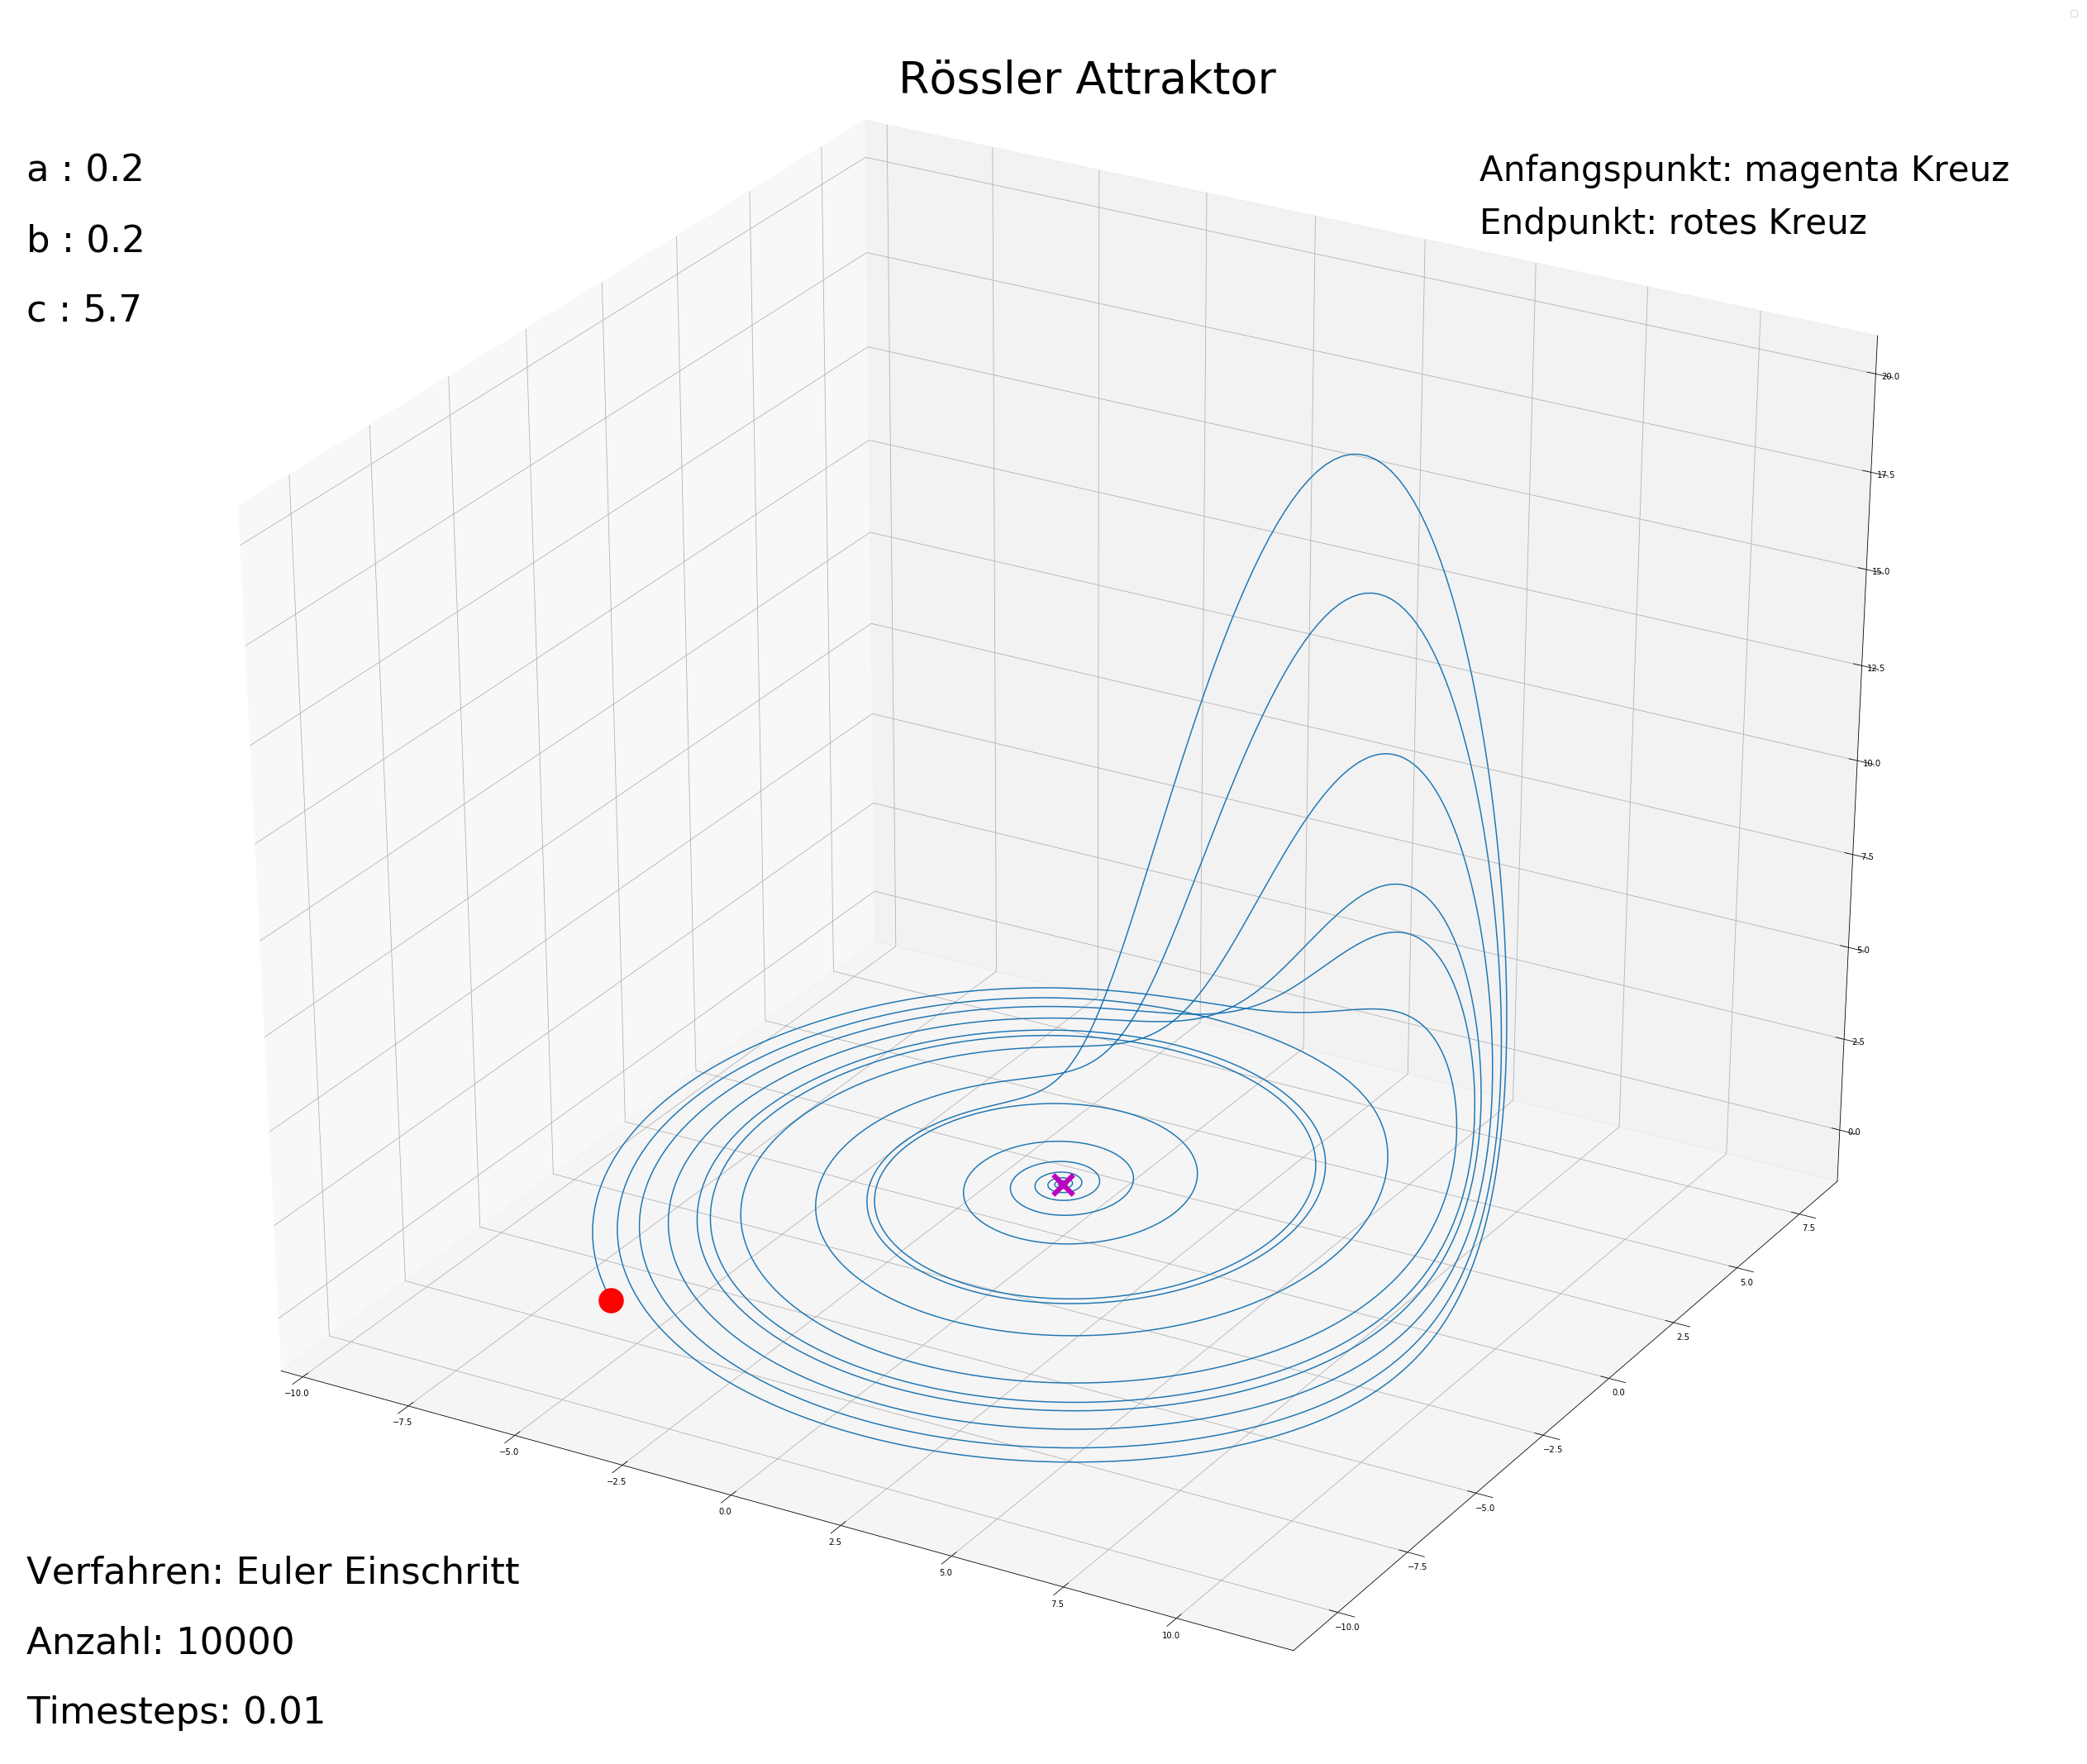

In [31]:
rössler()

## Peter de Jong Attraktor

In [32]:
def jong (vec,a=1.641,b=1.902,c=0.316,d=1.525):
    return np.array([np.sin(a*vec[1])-np.cos(b*vec[0]),np.sin(c*vec[0])-np.cos(d*vec[1])])